In [92]:
# install the libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')



In [93]:
# load the data
df = pd.read_csv(r'C:\Users\akash\Downloads\SPY (2).csv')
df.head()
C:\Users\akash\OneDrive\Desktop\DATA SCIENCE\Projects\Project 1\SLV_dat.csv

SyntaxError: unexpected character after line continuation character (<ipython-input-93-f4413702c706>, line 4)

In [94]:
# getting the number of trading days
df.shape

(2687, 2)

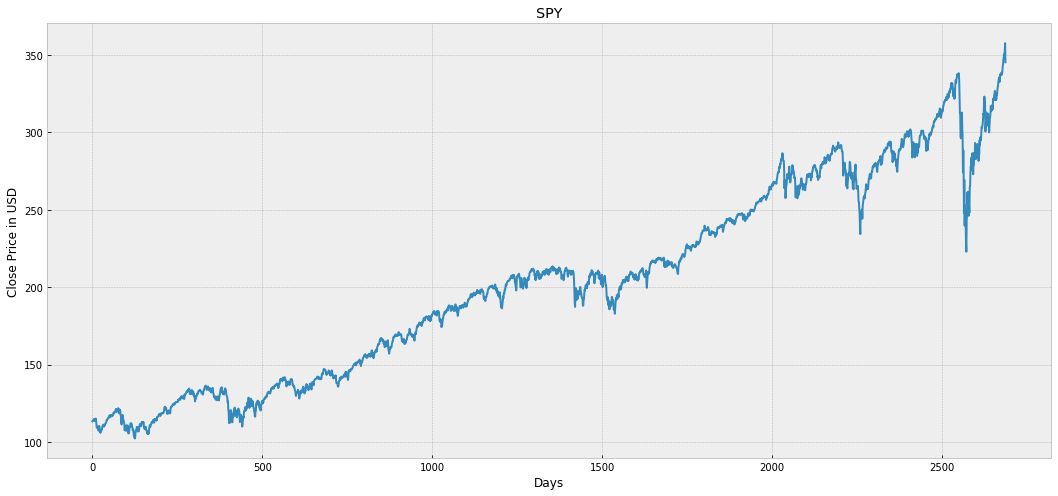

In [95]:
# visualise the close price data
plt.figure(figsize=(18,8))
plt.title('SPY')
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.plot(df['Close'])
plt.show()

In [96]:
# Getting the close price
df = df[['Close']]
print(df.head)

<bound method NDFrame.head of            Close
0     113.330002
1     113.629997
2     113.709999
3     114.190002
4     114.570000
...          ...
2682  350.579987
2683  349.309998
2684  352.600006
2685  357.700012
2686  345.390015

[2687 rows x 1 columns]>


In [97]:
# # Variable to predict "x" days out in the future:
# future_days = 25
# # create a new column(target data)
# df['Prediction'] = df[['Close']].shift(future_days)
# df.head()

In [106]:
future_days = 250
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(5)


,Close,Prediction
2682,350.579987,NaN
2683,349.309998,NaN
2684,352.600006,NaN
2685,357.700012,NaN
2686,345.390015,NaN


In [107]:
# Create a feature Data set (x) and convert it to numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)


[[113.330002]
 [113.629997]
 [113.709999]
 ...
 [297.820007]
 [298.049988]
 [298.200012]]


In [108]:
# Create the target data set(y) and convert it to numpy array and get all of the target values except the last 'x' rows/days
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[125.720001 125.75     127.050003 ... 352.600006 357.700012 345.390015]


In [109]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25)

In [110]:
# Create the models
# create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
# Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)


In [111]:
# Getting the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[289.049988],
       [289.119995],
       [290.829987],
       [290.880005],
       [289.339996],
       [290.910004],
       [291.220001],
       [293.579987],
       [291.98999 ],
       [291.019989],
       [290.75    ],
       [289.880005],
       [290.690002],
       [290.720001],
       [291.730011],
       [291.559998],
       [291.720001],
       [289.440002],
       [287.820007],
       [287.820007],
       [287.399994],
       [278.299988],
       [272.170013],
       [275.950012],
       [274.399994],
       [280.399994],
       [280.450012],
       [276.399994],
       [276.25    ],
       [275.01001 ],
       [273.609985],
       [265.320007],
       [270.079987],
       [265.329987],
       [263.859985],
       [267.769989],
       [270.630005],
       [273.51001 ],
       [271.890015],
       [273.390015],
       [275.119995],
       [281.01001 ],
       [280.5     ],
       [277.76001 ],
       [272.570007],
       [272.059998],
       [270.200012],
       [273.0

In [112]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)


[298.130005  300.25      301.290009  301.089996  300.160004  301.089996
 298.209991  301.079987  298.279999  298.209991  310.619995  297.619995
 297.        295.399994  296.769989  293.23999   288.059998  290.420013
 293.7149965 293.7149965 288.529999  299.079987  293.23999   296.279999
 295.950012  298.880005  298.399994  297.970001  297.970001  299.98999
 299.01001   299.880005  300.369995  299.880005  303.299988  278.679993
 304.140015  303.329987  306.140015  307.369995  299.98999   307.100006
 308.179993  308.940002  308.350006  286.660004  309.100006  309.549988
 311.790009  280.420013  311.929993  310.769989  270.25      310.959991
 313.369995  314.079987  304.8450015 314.309998  300.75      309.549988
 311.459991  285.970001  292.3549955 311.929993  263.570007  270.619995
 317.130005  317.320007  287.399994  319.570007  319.589996  320.899994
 320.730011  321.220001  321.230011  283.600006  322.859985  321.079987
 321.859985  324.869995  322.410004  323.640015  322.730011  271.

C:\Users\akash\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


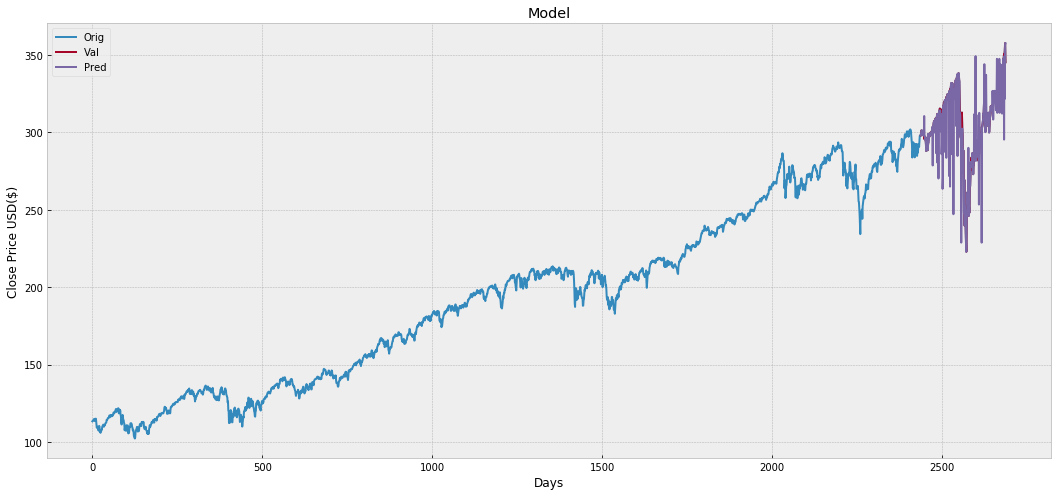

In [113]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize= (18,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()